In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data/internet_service_churn.csv")
df.head

<bound method NDFrame.head of             id  is_tv_subscriber  is_movie_package_subscriber  \
0           15                 1                            0   
1           18                 0                            0   
2           23                 1                            0   
3           27                 0                            0   
4           34                 0                            0   
...        ...               ...                          ...   
72269  1689648                 1                            1   
72270  1689676                 1                            0   
72271  1689679                 1                            0   
72272  1689733                 0                            0   
72273  1689744                 1                            1   

       subscription_age  bill_avg  reamining_contract  service_failure_count  \
0                 11.95        25                0.14                      0   
1                  8.22      

In [3]:
df.shape

(72274, 11)

In [4]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

In [5]:
# Виявлення відсутніх значень у кожній колонці
missing_values = df.isnull().sum()
print("Кількість відсутніх значень у кожній колонці:")
print(missing_values)

Кількість відсутніх значень у кожній колонці:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


!!!!! пропоную видалити тих кілька рядків, де download_avarage i upload_avarage не мають значень.

In [6]:
df = df.dropna(subset=['download_avg'])
df.shape

(71893, 11)

In [7]:
df = df.dropna(subset=['upload_avg'])
df.shape

(71893, 11)

In [11]:
# Запис очищеного датафрейму у CSV-файл
df.to_csv('data/partially_cleaned_data.csv', index=False)

Кореляційна матриця:
                                   id  is_tv_subscriber  \
id                           1.000000          0.283385   
is_tv_subscriber             0.283385          1.000000   
is_movie_package_subscriber  0.131648          0.337044   
subscription_age            -0.598800          0.089993   
bill_avg                     0.028724         -0.076198   
reamining_contract           0.340534          0.182802   
service_failure_count       -0.024655         -0.016023   
download_avg                 0.241278          0.131650   
upload_avg                   0.145936          0.065791   
download_over_limit         -0.229176         -0.103807   
churn                       -0.448660         -0.329417   

                             is_movie_package_subscriber  subscription_age  \
id                                              0.131648         -0.598800   
is_tv_subscriber                                0.337044          0.089993   
is_movie_package_subscriber         

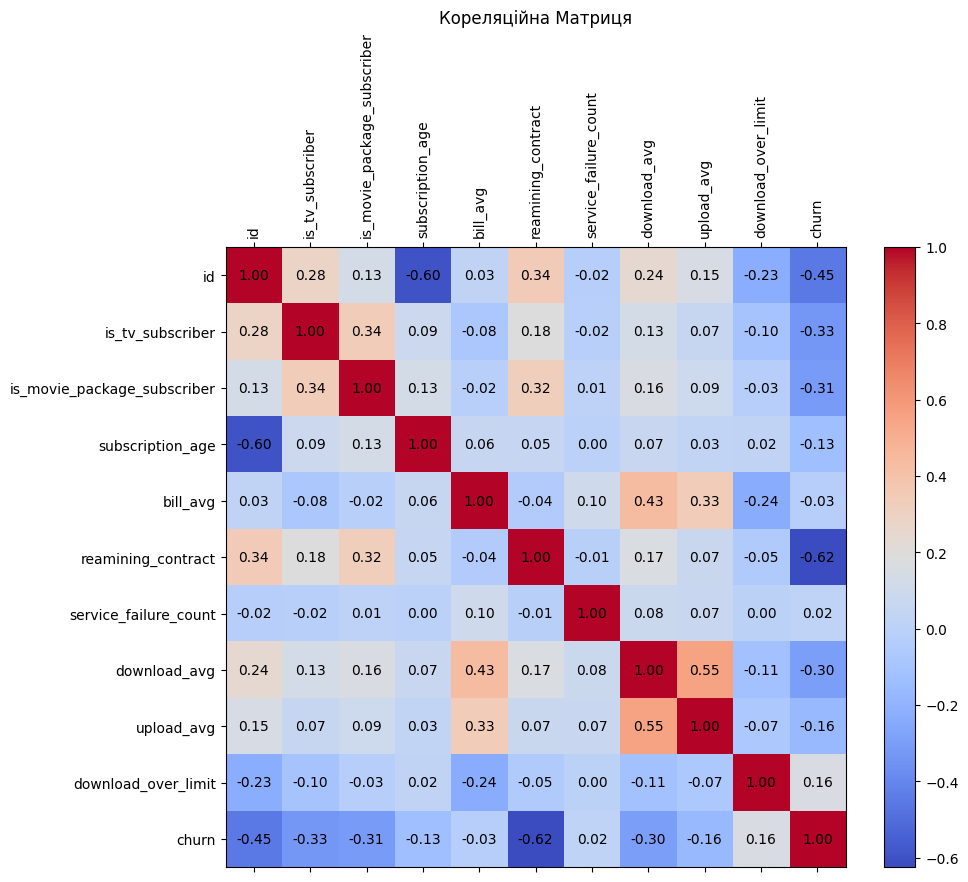

In [9]:
# Розрахунок кореляційної матриці
correlation_matrix = df.corr()

# Виведення кореляційної матриці
print("Кореляційна матриця:")
print(correlation_matrix)

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

# Додавання міток осей
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Додавання кольорової смуги
plt.colorbar()

# Додавання числових значень на теплову карту
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Кореляційна Матриця')
plt.show()

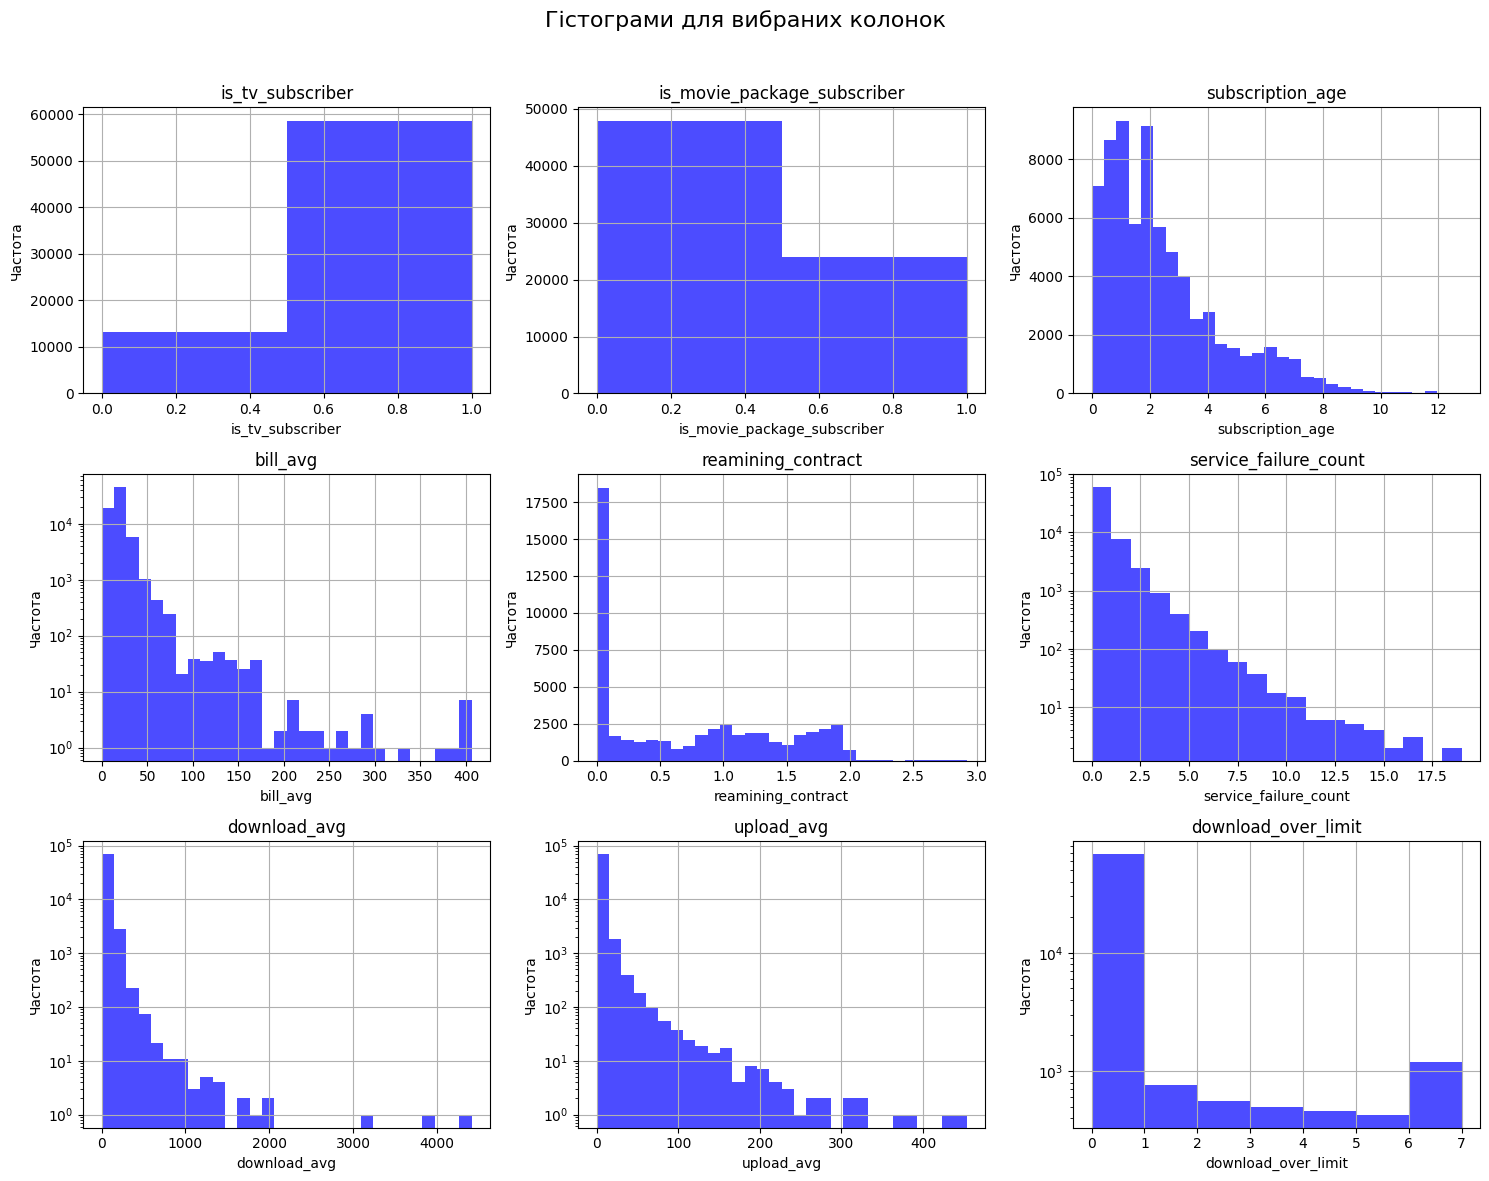

In [10]:
# Вибір колонок для побудови гістограм (без першої та останньої)
columns_to_plot = df.columns[1:-1]

# Створення фігури та підграфіків (3 рядки по 3 підграфіки)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 сітка, загальний розмір фігури 15x12 дюймів
fig.suptitle('Гістограми для вибраних колонок', fontsize=16)

# Перебір колонок і відповідних підграфіків
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]  # Вибір підграфіка в сітці
    nof_bins = 30
    if i == 0 or i == 1: nof_bins = 2 
    if i == 5 or i == 8: nof_bins = df[column].max()
    
    ax.hist(df[column].dropna(), bins=nof_bins, color='blue', alpha=0.7)  # Побудова гістограми
    ax.set_title(f'{column}')  # Назва для кожного підграфіка
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(True)  # Додавання сітки
    if i == 3 or i == 5 or i == 6 or i == 7 or i == 8: ax.set_yscale("log")

# Автоматичне коригування відстаней між підграфіками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Відображення фігури
plt.show()
